In [10]:
import pandas as pd
import numpy as nlp
import datetime
from matplotlib import pyplot as plt

pd.options.display.max_columns = 50

In [12]:
file_path = "/Users/mko4003/Documents/coding projects/codeacademny_yelp_resturants/yelp_regression_project"
business = pd.read_json(f"{file_path}/yelp_business.json", lines=True)
checkin = pd.read_json(f"{file_path}/yelp_checkin.json", lines=True)
photo = pd.read_json(f"{file_path}/yelp_photo.json", lines=True)
tip = pd.read_json(f"{file_path}/yelp_tip.json", lines=True)
review = pd.read_json(f"{file_path}/yelp_review.json", lines=True)
user = pd.read_json(f"{file_path}/yelp_user.json", lines=True)

In [13]:
data = pd.merge(
    business,
    checkin,
    on='business_id',
    how='left'
)
data = pd.merge(
    data,
    photo,
    on='business_id',
    how='left'
)

data = pd.merge(
    data,
    tip,
    on='business_id',
    how='left'
)

data = pd.merge(
    data,
    review,
    on='business_id',
    how='left'
)

data = pd.merge(
    data,
    user,
    on='business_id',
    how='left'
)

# Data cleaning

In [14]:
features_to_remove = ['address','attributes','business_id','categories','city','hours','is_open','latitude','longitude','name','neighborhood','postal_code','state','time']

data.drop(features_to_remove, axis=1, inplace=True)

In [15]:
data.isna().any()[data.isna().any()]

weekday_checkins          True
weekend_checkins          True
average_caption_length    True
number_pics               True
average_tip_length        True
number_tips               True
dtype: bool

In [16]:
data.fillna({'weekday_checkins':0,
           'weekend_checkins':0,
           'average_caption_length':0,
           'number_pics':0,
           'average_tip_length':0,
           'number_tips':0},
          inplace=True)

# Correlations

In [17]:
data.corr()['stars'].reset_index()

,index,stars
0,alcohol?,-0.043332
1,good_for_kids,-0.030382
2,has_bike_parking,0.068084
3,has_wifi,-0.039857
4,price_range,-0.052565
5,review_count,0.032413
6,stars,1.000000
7,take_reservations,-0.024486
8,takes_credit_cards,0.037748
9,weekday_checkins,0.004130


In [1]:
## Optional plots to view correlations ##
# from matplotlib import pyplot as plt
# plt.scatter(data['average_review_sentiment'], data['stars'], alpha=0.1)
# plt.show()
# plt.scatter(data['average_review_length'], data['stars'], alpha=0.1)
# plt.show()
# plt.scatter(data['average_review_age'], data['stars'], alpha=0.1)
# plt.show()
# plt.scatter(data['number_funny_votes'], data['stars'], alpha=0.1)
# plt.show()


In [30]:
features = data[['average_review_length', 'average_review_age']]
ratings = data['stars']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, ratings, test_size=0.2, random_state=1)

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [36]:
model.score(X_train, Y_train)

0.08250309566544889

In [37]:
sorted(list(zip(['average_review_length','average_review_age'],model.coef_)),key = lambda x: abs(x[1]),reverse=True)

[('average_review_length', -0.0009977176852074597),
 ('average_review_age', -0.00011621626836366412)]

In [38]:
y_predicted = model.predict(X_test)

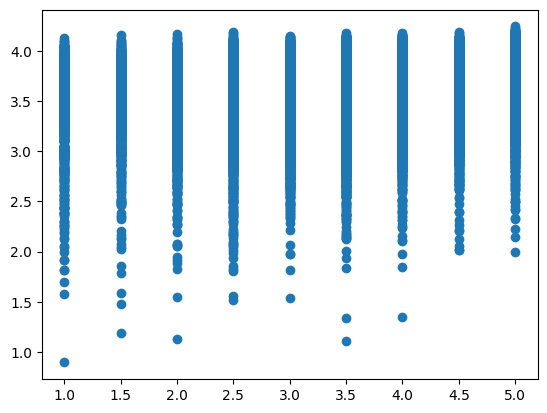

In [40]:
plt.scatter(Y_test, y_predicted)

In [71]:
# subset of only average review sentiment
sentiment = ['average_review_sentiment']
# subset of all features that have a response range [0,1]
binary_features = ['alcohol?','has_bike_parking','takes_credit_cards','good_for_kids','take_reservations','has_wifi']
# subset of all features that vary on a greater range than [0,1]
numeric_features = ['review_count','price_range','average_caption_length','number_pics','average_review_age','average_review_length','average_review_sentiment','number_funny_votes','number_cool_votes','number_useful_votes','average_tip_length','number_tips','average_number_friends','average_days_on_yelp','average_number_fans','average_review_count','average_number_years_elite','weekday_checkins','weekend_checkins']
# all features
all_features = binary_features + numeric_features

In [72]:
x_train, x_test, y_train, y_test = train_test_split(data[all_features], ratings, test_size=0.2, random_state=1)

In [73]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [74]:
model.score(x_train, y_train)

0.6807828861895335

In [75]:
y_predicted = model.predict(x_test)

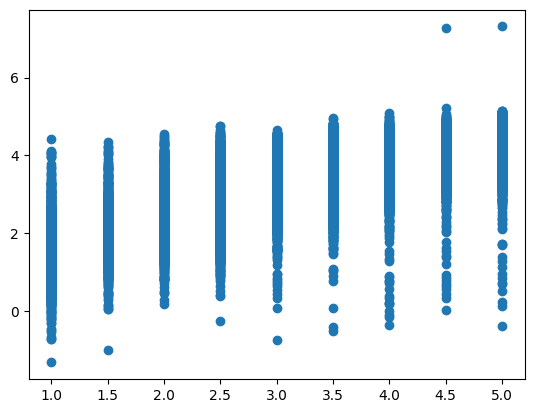

In [63]:
plt.scatter(y_test, y_predicted)

In [66]:
import numpy as np

# take a list of features to model as a parameter
def model_these_features(feature_list):
    
    # 
    ratings = data.loc[:,'stars']
    features = data.loc[:,feature_list]
    
    # 
    X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
    
    # don't worry too much about these lines, just know that they allow the model to work when
    # we model on just one feature instead of multiple features. Trust us on this one :)
    if len(X_train.shape) < 2:
        X_train = np.array(X_train).reshape(-1,1)
        X_test = np.array(X_test).reshape(-1,1)
    
    # 
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    # 
    print('Train Score:', model.score(X_train,y_train))
    print('Test Score:', model.score(X_test,y_test))
    
    # print the model features and their corresponding coefficients, from most predictive to least predictive
    print(sorted(list(zip(feature_list,model.coef_)),key = lambda x: abs(x[1]),reverse=True))
    
    # 
    y_predicted = model.predict(X_test)
    
    # 
    plt.scatter(y_test,y_predicted)
    plt.xlabel('Yelp Rating')
    plt.ylabel('Predicted Yelp Rating')
    plt.ylim(1,5)
    plt.show()

Train Score: 0.6807828861895335
Test Score: 0.6782129045869245
[('average_review_sentiment', 2.280845699662313), ('alcohol?', -0.14991498593454491), ('has_wifi', -0.12155382629275352), ('good_for_kids', -0.11807814422006865), ('price_range', -0.0648673015004297), ('average_number_years_elite', -0.06278939713895311), ('has_bike_parking', 0.027296969912304365), ('takes_credit_cards', 0.02445183785363329), ('take_reservations', 0.014134559173014233), ('number_pics', -0.0013133612300818061), ('average_number_fans', 0.0010267986822655255), ('number_cool_votes', 0.0009723722734416832), ('number_tips', -0.0008546563320878108), ('average_caption_length', -0.0006472749798185737), ('average_review_length', -0.000589625792027256), ('average_tip_length', -0.0004205217503405679), ('number_useful_votes', -0.00027150641256192947), ('average_review_count', -0.00023398356902511368), ('average_review_age', -0.00015776544111323828), ('average_days_on_yelp', 0.00012326147662882996), ('review_count', 0.000

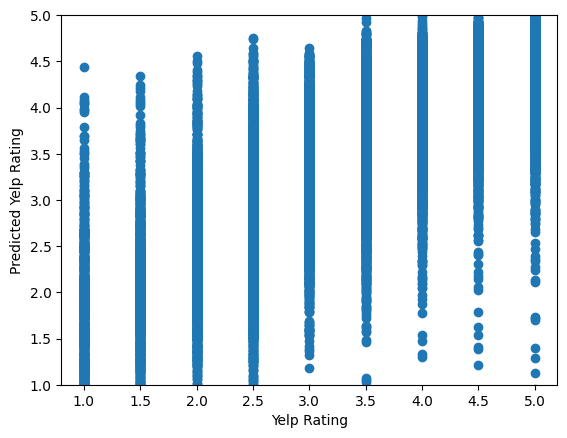

In [70]:
model_these_features(all_features)

In [76]:
all_features

['alcohol?',
 'has_bike_parking',
 'takes_credit_cards',
 'good_for_kids',
 'take_reservations',
 'has_wifi',
 'review_count',
 'price_range',
 'average_caption_length',
 'number_pics',
 'average_review_age',
 'average_review_length',
 'average_review_sentiment',
 'number_funny_votes',
 'number_cool_votes',
 'number_useful_votes',
 'average_tip_length',
 'number_tips',
 'average_number_friends',
 'average_days_on_yelp',
 'average_number_fans',
 'average_review_count',
 'average_number_years_elite',
 'weekday_checkins',
 'weekend_checkins']

In [77]:
features = data.loc[:,all_features]
ratings = data.loc[:,'stars']
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [78]:
pd.DataFrame(list(zip(features.columns,features.describe().loc['mean'],features.describe().loc['min'],features.describe().loc['max'])),columns=['Feature','Mean','Min','Max'])

,Feature,Mean,Min,Max
0,alcohol?,0.140610,0.000000,1.000000
1,has_bike_parking,0.350692,0.000000,1.000000
2,takes_credit_cards,0.700243,0.000000,1.000000
3,good_for_kids,0.279029,0.000000,1.000000
4,take_reservations,0.106086,0.000000,1.000000
5,has_wifi,0.134968,0.000000,1.000000
6,review_count,31.797310,3.000000,7968.000000
7,price_range,1.035855,0.000000,4.000000
8,average_caption_length,2.831829,0.000000,140.000000
9,number_pics,1.489939,0.000000,1150.000000


In [79]:
ondo = np.array([1, 0, 1, 1, 1, 1, 31, 1.4, 2.8, 2, 35, 243, 0.78, 20, 300, 2034, 58, 10, 105, 1000, 34, 5032, 0.3, 2000, 4432]).reshape(1,-1)
model.predict(ondo)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.4281825])